# Import libraries

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import session_info

In [10]:
try:
    session_info_output = session_info.show()
except Exception as error:
    print("The session info has been requested already:")
    
session_info_output

The session info has been requested already:


In [11]:
import janitor # This library generates an error when I execute session_info()

# Import external files

- Extension of the "missing" functions from Pandas
- DataFrame and dictionary functions
- Statistical functions

In [12]:
%run utils/u.0.0-pandas_missing_extension.ipynb
%run utils/u.0.1-df_functions.ipynb
%run utils/u.0.2-statistical-functions.ipynb

# Get the processed data (V2)

In [13]:
arg_di_df = pd.read_csv('../data/processed/WDICSV_PROCESSED_V2.csv').clean_names(case_type="snake")

print(arg_di_df.shape)
arg_di_df.info()

(54, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   year                    54 non-null     int64  
 1   it_mlt_main             54 non-null     float64
 2   ny_gdp_mktp_kd_zg       54 non-null     float64
 3   ny_gdp_pcap_kd          54 non-null     float64
 4   ny_gdp_pcap_kd_zg       54 non-null     float64
 5   sp_dyn_le00_in          53 non-null     float64
 6   it_cel_sets             54 non-null     float64
 7   sh_dth_imrt             53 non-null     float64
 8   sp_pop_0014_to_zs       54 non-null     float64
 9   sp_pop_1564_to_zs       54 non-null     float64
 10  sp_pop_65_up_to_zs      54 non-null     float64
 11  sp_pop_totl             54 non-null     float64
 12  sm_pop_refg             54 non-null     float64
 13  sm_pop_refg_or          44 non-null     float64
 14  se_pre_enrr             45 non-null

# Get columns names and types

In [14]:
indicators_names, categorical_cols, numeric_cols, columns_with_missing_values = get_columns(arg_di_df)

In [15]:
print(f'Total Columns: {len(indicators_names)}')
print(f'Categorical Columns: {len(categorical_cols)}')
print(f'Numeric Columns: {len(numeric_cols)}')

Total Columns: 28
Categorical Columns: 6
Numeric Columns: 22


In [16]:
indicators_names

['year, Year',
 'it_mlt_main, Fixed telephone subscriptions',
 'ny_gdp_mktp_kd_zg, GDP growth (annual %)',
 'ny_gdp_pcap_kd, GDP per capita (constant 2015 US$)',
 'ny_gdp_pcap_kd_zg, GDP per capita growth (annual %)',
 'sp_dyn_le00_in, Life expectancy at birth, total (years)',
 'it_cel_sets, Mobile cellular subscriptions',
 'sh_dth_imrt, Number of infant deaths',
 'sp_pop_0014_to_zs, Population ages 0-14 (% of total population)',
 'sp_pop_1564_to_zs, Population ages 15-64 (% of total population)',
 'sp_pop_65_up_to_zs, Population ages 65 and above (% of total population)',
 'sp_pop_totl, Population, total',
 'sm_pop_refg, Refugee population by country or territory of asylum',
 'sm_pop_refg_or, Refugee population by country or territory of origin',
 'se_pre_enrr, School enrollment, preprimary (% gross)',
 'se_prm_enrr, School enrollment, primary (% gross)',
 'se_sec_enrr, School enrollment, secondary (% gross)',
 'se_ter_enrr, School enrollment, tertiary (% gross)',
 'sp_urb_totl_in_zs,

In [9]:
columns_with_missing_values

['sm_pop_refg_or',
 'se_ter_enrr',
 'se_pre_enrr',
 'se_prm_enrr',
 'se_sec_enrr',
 'sp_dyn_le00_in',
 'sh_dth_imrt']

# Target variable:

sp_dyn_le00_in (Life expectancy at birth, total (years))

In [10]:
target_variable = "sp_dyn_le00_in"
target_variable_name = get_indicator_name(target_variable, True)

## Univariate analysis

In [11]:
arg_di_df[[target_variable]].describe()

,sp_dyn_le00_in
count,53.000000
mean,72.400774
std,3.599354
min,65.541000
25%,69.195000
50%,73.172000
75%,75.641000
max,77.284000


Figure saved to: ../reports/figures/target_variable/Distribution of Life expectancy at birth, total (years).png


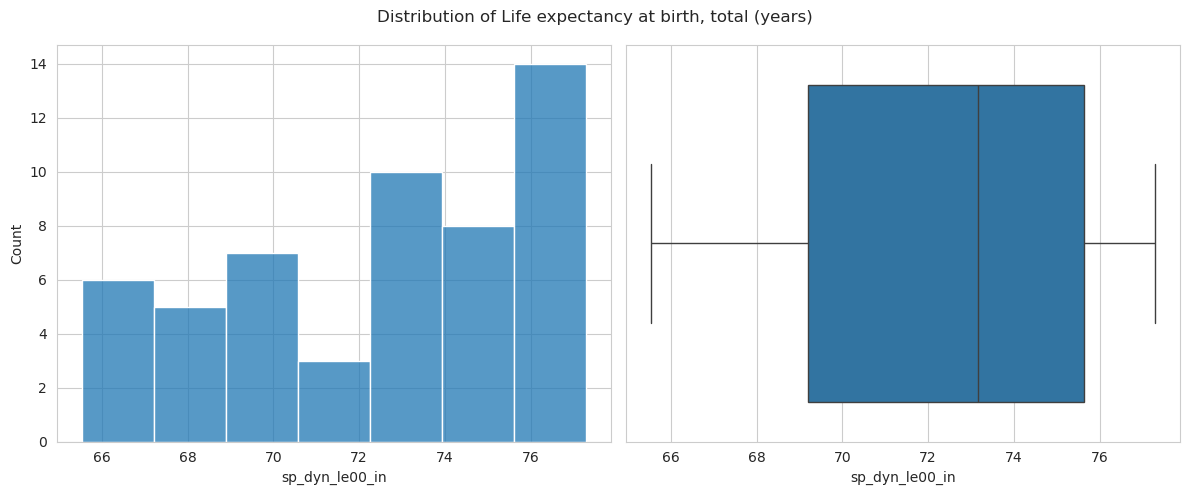

In [12]:
fig, axes = plt.subplots(1,2,figsize=(12,5))

sns.histplot(data=arg_di_df, x=target_variable, ax=axes[0])
sns.boxplot(data=arg_di_df, x=target_variable, ax=axes[1])

title = f"Distribution of {target_variable_name}"

fig.suptitle(title)
plt.tight_layout()
save_figure(title, subfolder="target_variable")
plt.show()

In [13]:
skewness = arg_di_df[target_variable].skew()
kurtosis = arg_di_df[target_variable].kurt()

print(f"Skewness of {target_variable_name}: {skewness}")
print(f"Kurtosis of {target_variable_name}: {kurtosis}")

Skewness of Life expectancy at birth, total (years): -0.44591279746203305
Kurtosis of Life expectancy at birth, total (years): -1.1097845518321208


Skewness value is within an moderate range

Kurtosis has an extreme value

In [14]:
detect_outliers(arg_di_df, [target_variable])

Outliers detection:
There are no outliers for Life expectancy at birth, total (years)


# Analyze the relationship between the target variable and the other variables 

## Correlation

Figure saved to: ../reports/figures/target_variable/Correlation between target variable (Life expectancy at birth, total (years)) and other variables.png


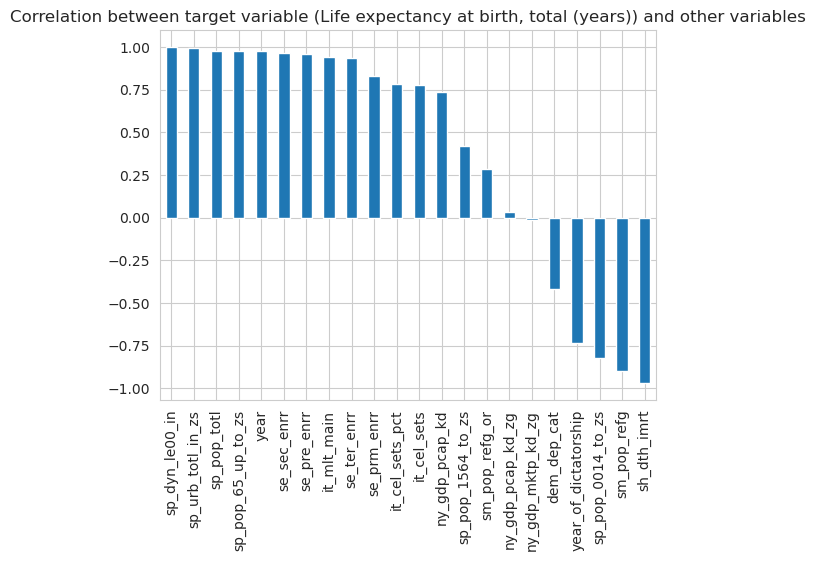

In [15]:
arg_di_df.corr(numeric_only=True)[target_variable].sort_values(ascending=False).plot(kind="bar")
title = "Correlation between target variable (Life expectancy at birth, total (years)) and other variables"
plt.title(title)
save_figure(title, subfolder="target_variable")
plt.show()

## Bivariate analysis

### Numerical variables

# TO DO: Save figures separately

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and year.png


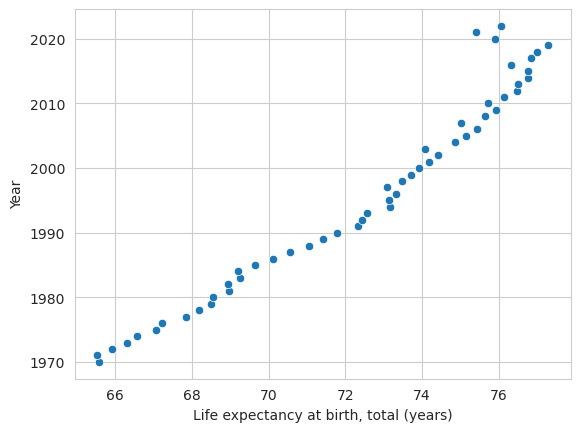

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and it_mlt_main.png


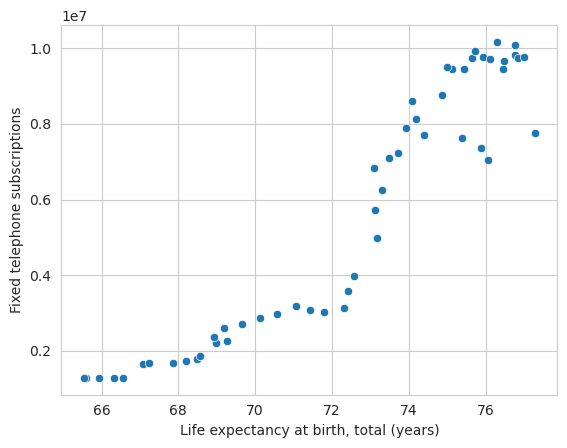

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and ny_gdp_mktp_kd_zg.png


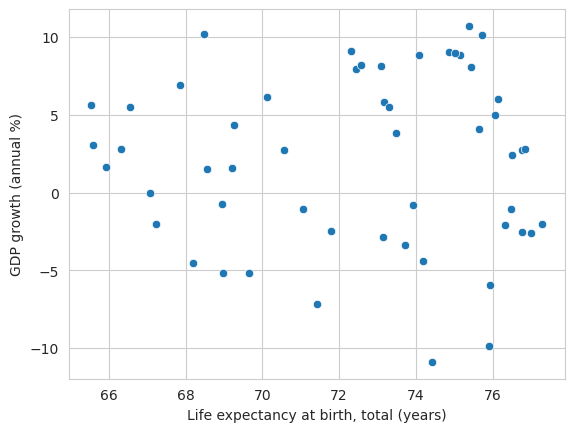

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and ny_gdp_pcap_kd.png


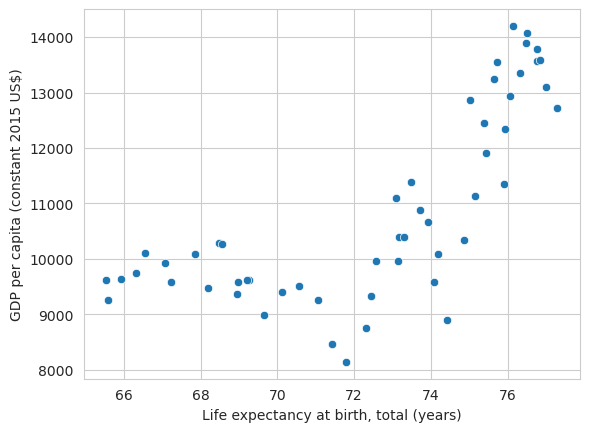

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and ny_gdp_pcap_kd_zg.png


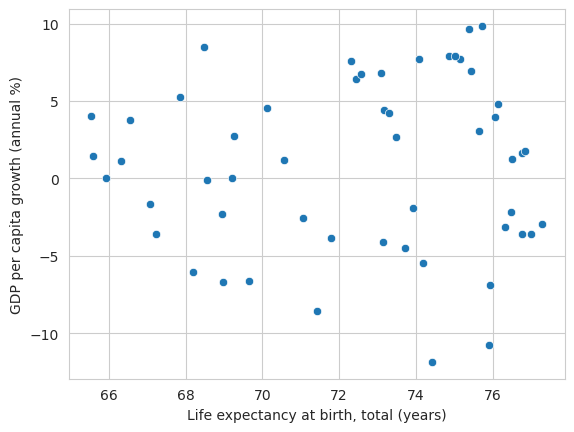

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and it_cel_sets.png


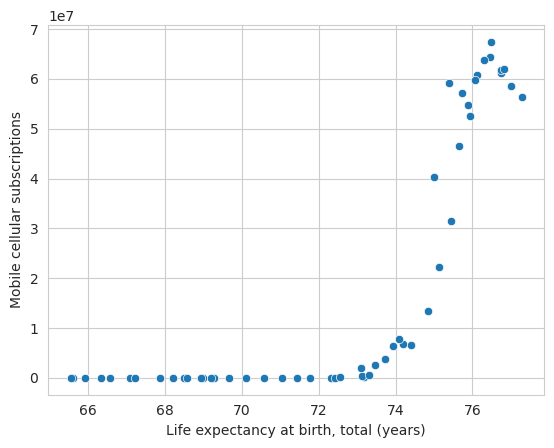

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sh_dth_imrt.png


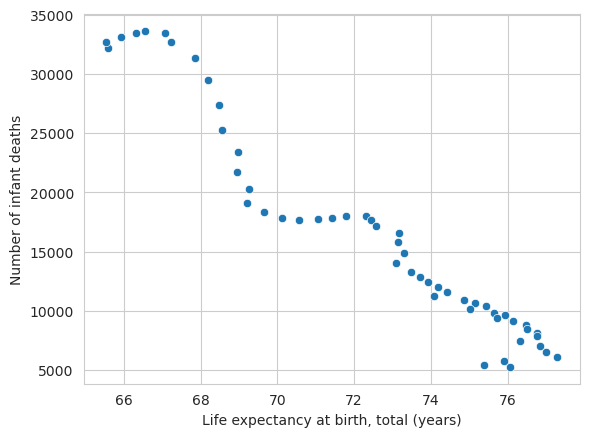

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sp_pop_0014_to_zs.png


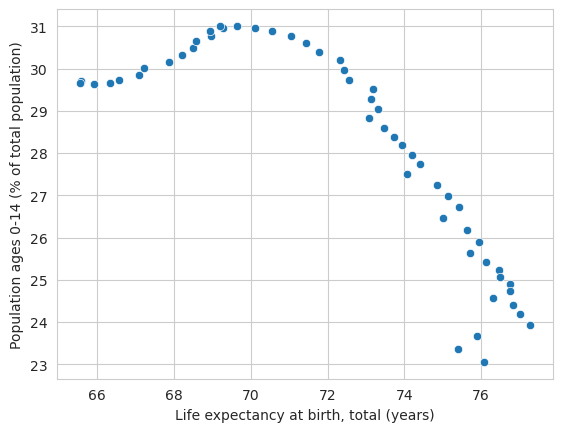

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sp_pop_1564_to_zs.png


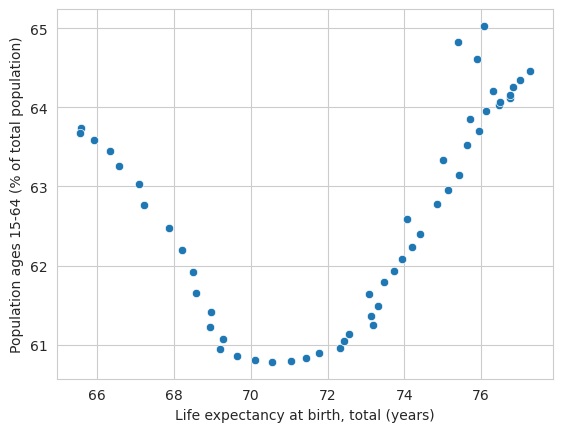

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sp_pop_65_up_to_zs.png


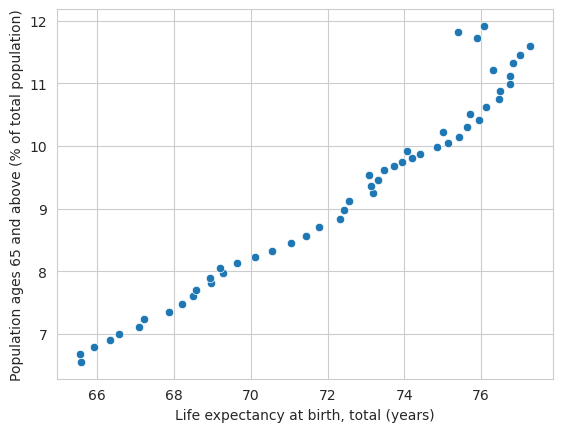

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sp_pop_totl.png


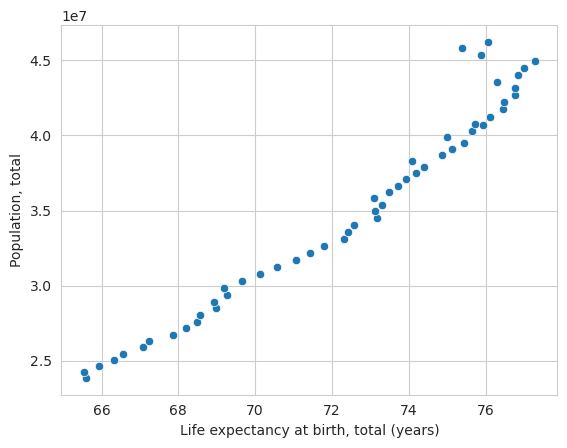

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sm_pop_refg.png


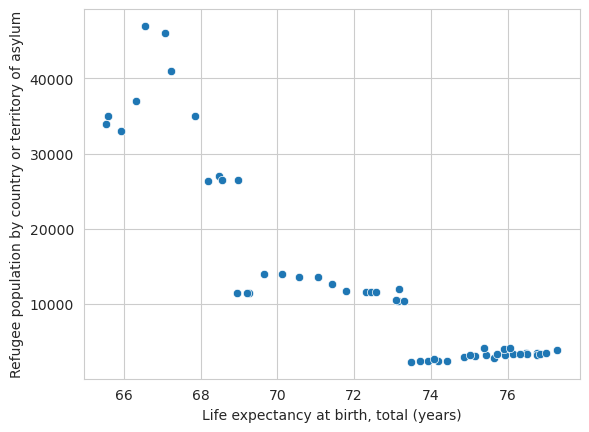

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sm_pop_refg_or.png


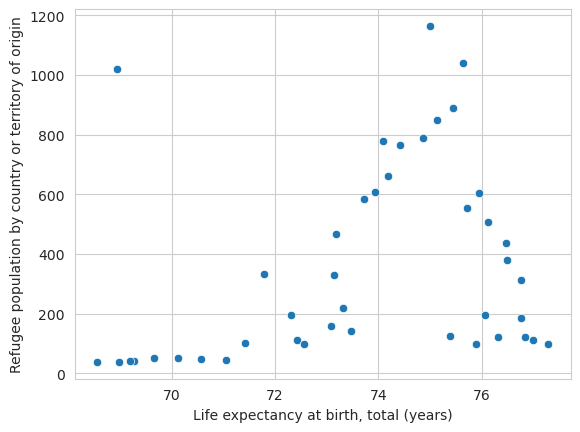

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and se_pre_enrr.png


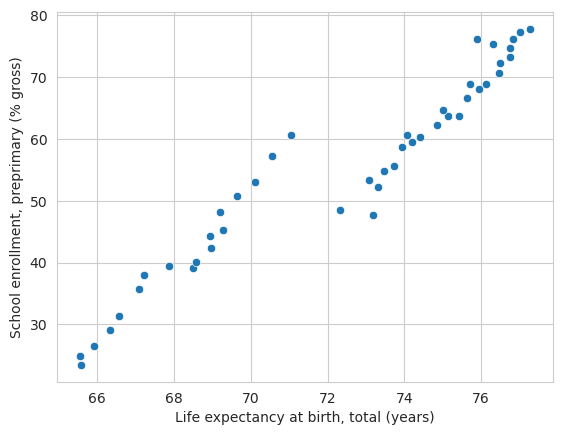

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and se_prm_enrr.png


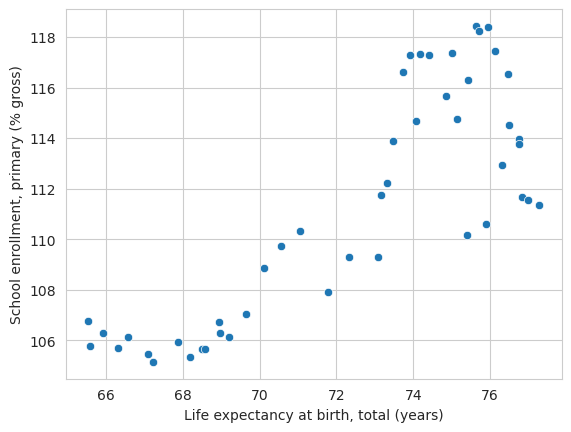

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and se_sec_enrr.png


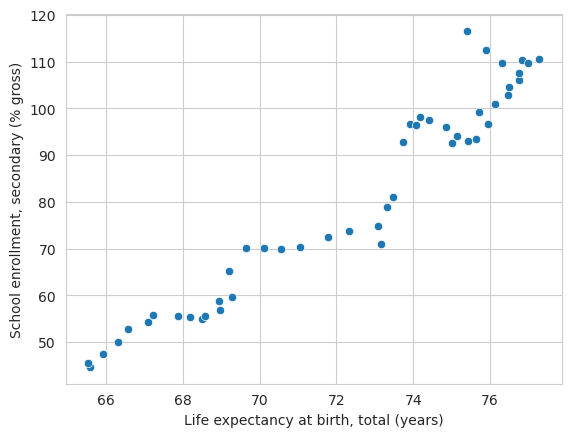

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and se_ter_enrr.png


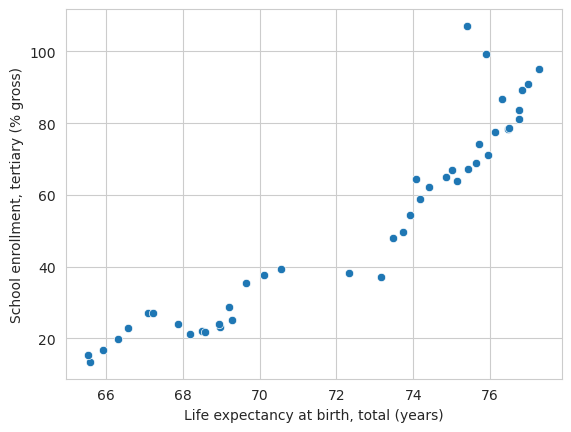

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and sp_urb_totl_in_zs.png


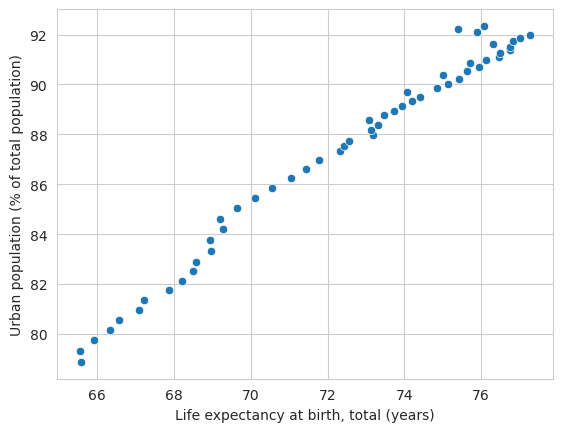

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and year_of_dictatorship.png


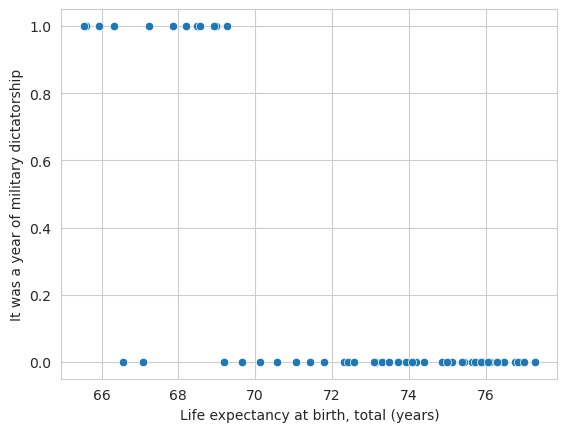

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and it_cel_sets_pct.png


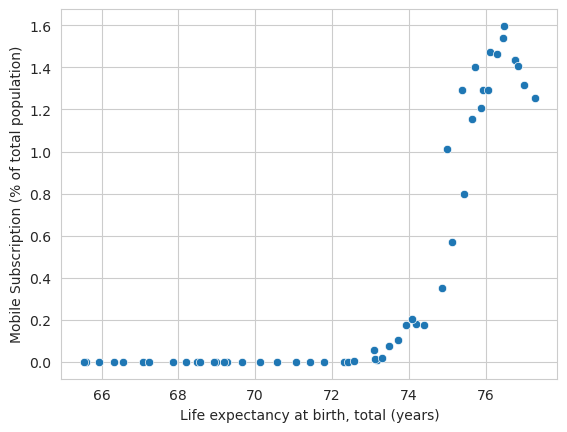

Figure saved to: ../reports/figures/target_variable/Scatter plot of sp_dyn_le00_in and dem_dep_cat.png


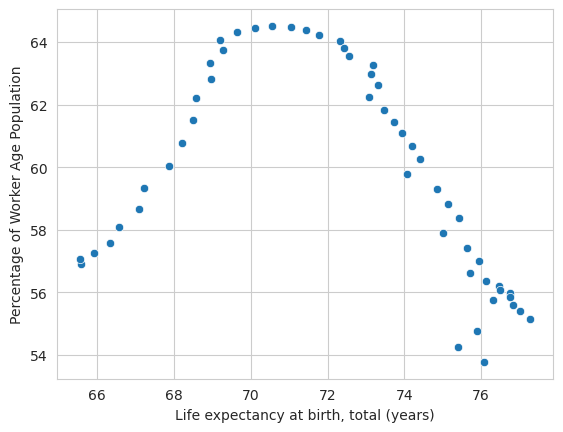

In [21]:
for i,col in enumerate(numeric_cols):
    if col != target_variable:
        sns.scatterplot(data=arg_di_df, x=target_variable, y=col)
        plt.xlabel(get_indicator_name(target_variable,True))
        plt.ylabel(get_indicator_name(col,True))
        
        title = f"Scatter plot of {target_variable} and {col}"
        save_figure(title, subfolder="target_variable")
        plt.show()

### Categorical variables

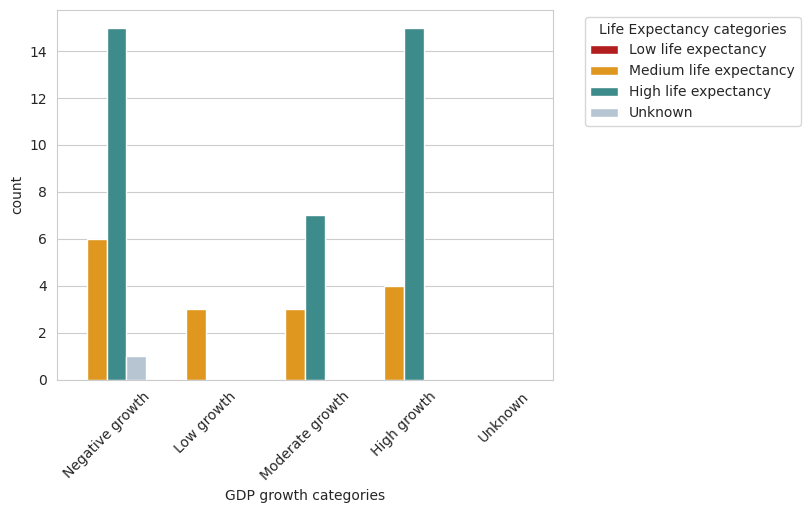

Figure saved to: ../reports/figures/target_variable/Distribution of GDP growth categories by Life Expectancy categories.png


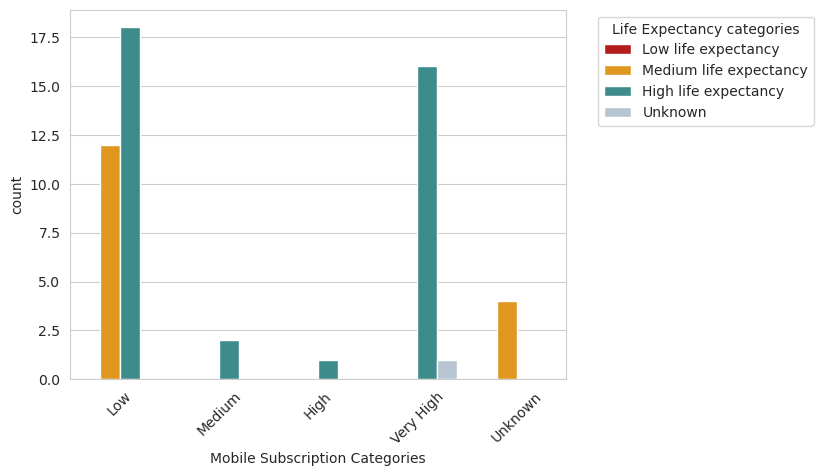

Figure saved to: ../reports/figures/target_variable/Distribution of Mobile Subscription Categories by Life Expectancy categories.png


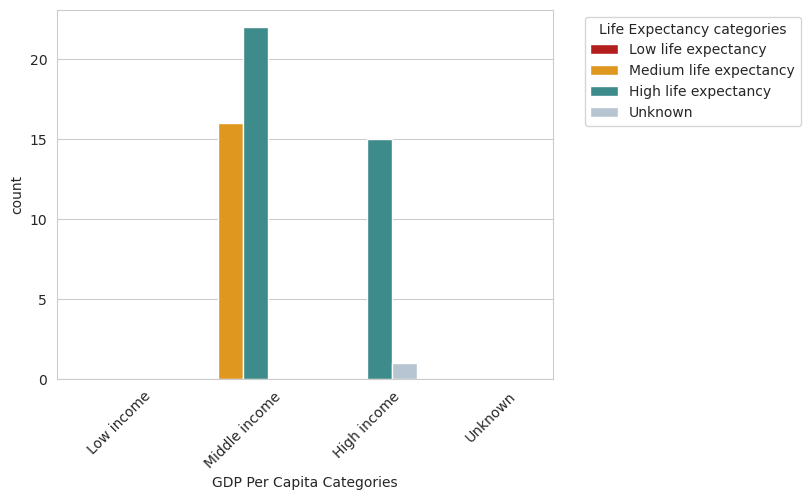

Figure saved to: ../reports/figures/target_variable/Distribution of GDP Per Capita Categories by Life Expectancy categories.png


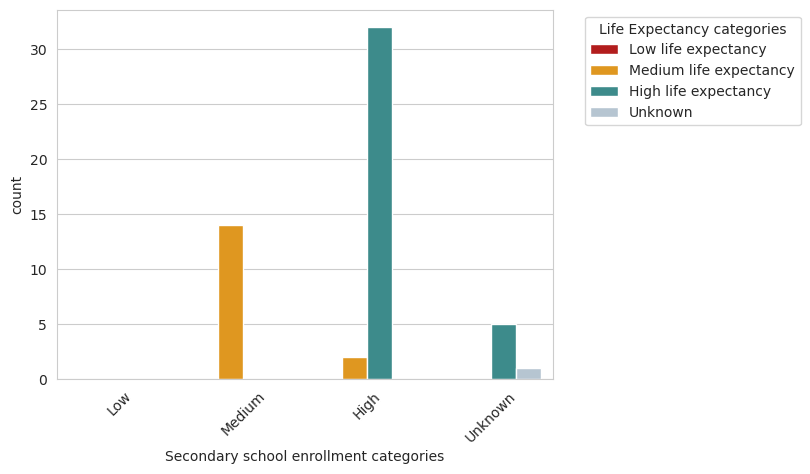

Figure saved to: ../reports/figures/target_variable/Distribution of Secondary school enrollment categories by Life Expectancy categories.png


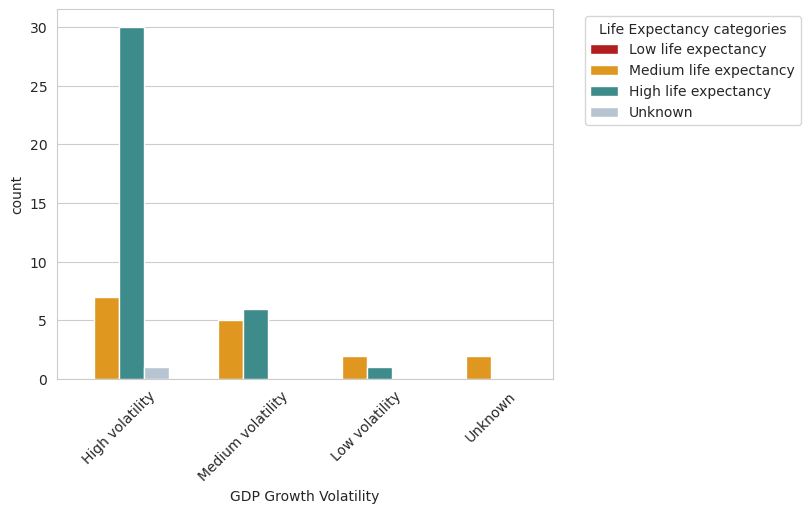

Figure saved to: ../reports/figures/target_variable/Distribution of GDP Growth Volatility by Life Expectancy categories.png


<Figure size 640x480 with 0 Axes>

In [22]:
categorical_cols_to_plot = categorical_cols[categorical_cols != target_variable+"_cat"]

for col in categorical_cols_to_plot:
    plot_categorical(arg_di_df, col, target_variable+"_cat")
    title= f"Distribution of {get_indicator_name(col,True)} by {get_indicator_name(target_variable+'_cat',True)}"
    save_figure(title,"target_variable")